In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import ModelWriters.Simulation.BaseSimulator as BS

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
base_sim = BS.BaseSimulator(model = 'linear')

In [ ]:
base_sim.a_hourly = 1.0
base_sim.a_daily = 100.0

In [ ]:
s = {}
s['day'] = 10
s['hour'] = 15

In [ ]:
base_sim.simulate(s)

In [ ]:
base_sim = BS.BaseSimulator(model = 'piecewise', post_random_model = 'gauss', post_random_up = 0.1, post_random_down=0.05)

In [ ]:
for h in range(24):
    s['hour'] = h
    print(10*base_sim.simulate(s))

In [45]:
import ModelWriters.Simulation.Demand as DS

In [46]:
demand = DS.DemandSimulator(post_random_up = 0.2, post_random_down = 0.2)

In [47]:
dias = [355, 100, 172, 250]
horas = range(24)

scenes = []

for d in dias:
    for h in horas:
        scenes.append({'day': d, 'hour': h})

In [48]:
demand_sim = []

for s in scenes:
    demand_sim.append(demand.simulate(s))

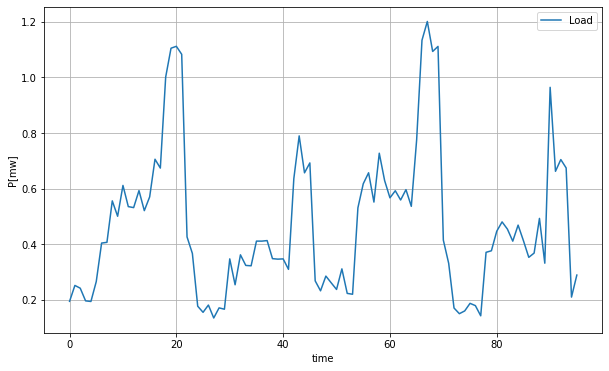

In [49]:
# Set the plot curve with markers and a title
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
##a=180*24
#b=360
##b=180*24+5*24
a=0
b=24
#for col in Resultados:
#    ax.plot(Resultados[col][a:b], label = col)

ax.plot(demand_sim, label = 'Load')

#ax.plot(Resultados['time'][240:360], Resultados['p_mw_PV'][240:360], label = 'PV')
#ax.plot(Resultados['time'][240:360], Resultados['p_mw_Load'][240:360], label = 'Load')

ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [50]:
demand = DS.DemandSimulator(post_random_up = 0.15, post_random_down = 0.15, summer_peak = 0.1, winter_peak=0.2)

scenes = []

for d in range(365):
    for h in horas:
        scenes.append({'day': d, 'hour': 21.0})
        
demand_sim = []

for s in scenes:
    demand_sim.append(demand.simulate(s))

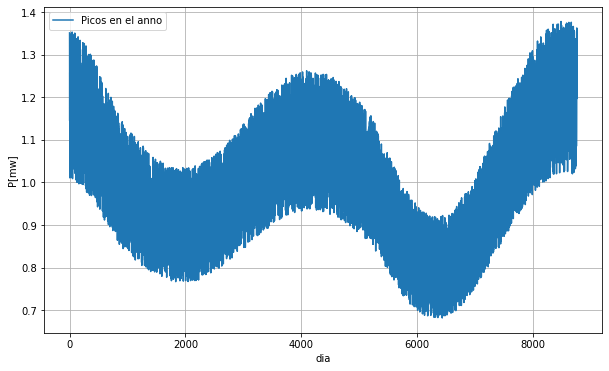

In [51]:

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(demand_sim, label = 'Picos en el anno')
ax.set_xlabel('dia')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
import ModelWriters.Simulation.Solar as SS 

In [ ]:
demand = SS.SolarIrradianceSimulator()

dias = [355, 100, 172, 250]
horas = range(24)

scenes = []

for d in dias:
    for h in horas:
        scenes.append({'day': d, 'hour': h})
        
demand_sim = []

for s in scenes:
    demand_sim.append(demand.simulate(s))
    
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)

ax.plot(demand_sim, label = 'Irradiation')

ax.set_xlabel('time')
ax.set_ylabel('I[w/m2]')

ax.legend()

ax.grid(True)


plt.show()
    

In [ ]:
sun = SS.SolarIrradianceSimulator()

scenes = []
days = [d for d in range(365)]
for d in days:
        scenes.append({'day': d, 'hour': 13.0})
        
sun_sim = []

for s in scenes:
    sun_sim.append(sun.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(days, sun_sim, label = 'Noon irradiance')
ax.set_xlabel('day')
ax.set_ylabel('I[W/m2]')

ax.legend()

ax.grid(True)


plt.show()

In [10]:
import math

In [ ]:
math.exp(1)

In [ ]:
math.floor(363/30)

In [ ]:
month = math.floor(363/30)

In [ ]:
month = 11 if month >= 12 else month
month

In [7]:
import ModelWriters.Simulation.Economics as Economics

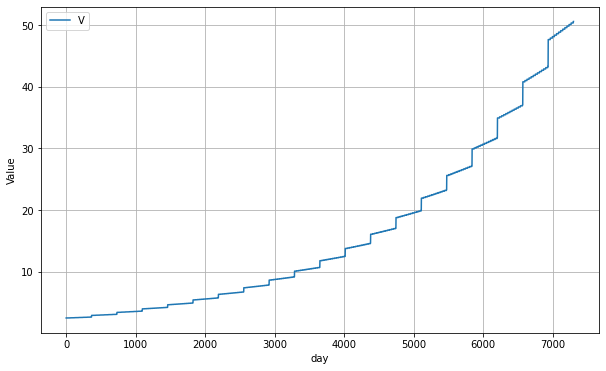

In [36]:
npv = Economics.DeterministicGrowthSimulator(annual_rate = 0.1)

npv.base = 1.5
npv.monthly_rate = 0.005
scenes = []
days = [d for d in range(365)]
years = [y for y in range(20)]
for y in years:
    for d in days:
        scenes.append({'year': y, 'day': d, 'hour': 13.0})
        
sim = []

for s in scenes:
    sim.append(npv.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'V')
ax.set_xlabel('day')
ax.set_ylabel('Value')

ax.legend()

ax.grid(True)


plt.show()

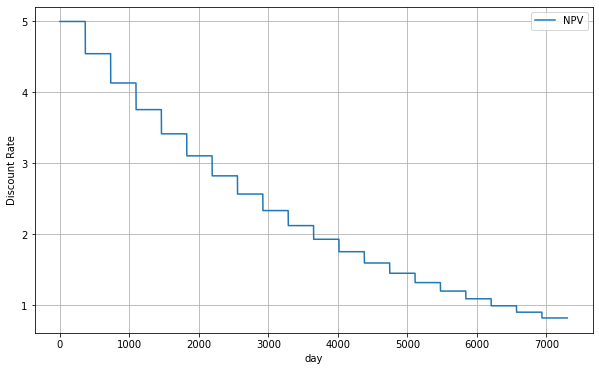

In [38]:
npv = Economics.PVSimulator(annual_rate = 0.1, base = 5.0)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(20)]
for y in years:
    for d in days:
        scenes.append({'year': y, 'day': d, 'hour': 13.0})
        
sim = []

for s in scenes:
    sim.append(npv.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'NPV')
ax.set_xlabel('day')
ax.set_ylabel('Discount Rate')

ax.legend()

ax.grid(True)


plt.show()

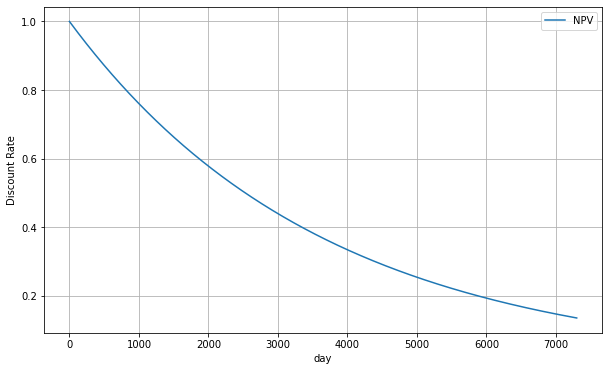

DR: 0.0002739726027396472 YR: 0.10515578161623251


In [40]:
npv = Economics.PVSimulator(annual_rate = 0.0, daily_rate = 0.1/365)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(20)]
for y in years:
    for d in days:
        scenes.append({'year': y, 'day': d, 'hour': 13.0})
        
sim = []

for s in scenes:
    sim.append(npv.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'NPV')
ax.set_xlabel('day')
ax.set_ylabel('Discount Rate')

ax.legend()

ax.grid(True)


plt.show()

print("DR: {0} YR: {1}".format(npv.daily_rate, npv.annual_rate))

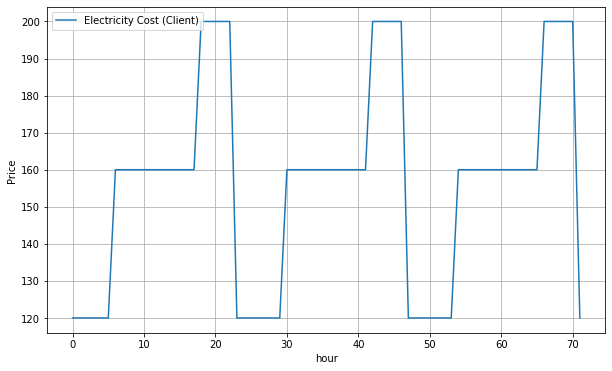

In [44]:
v = Economics.ElectricityCostSimulator()

scenes = []
days = [d for d in range(3)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []

for s in scenes:
    sim.append(v.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'Electricity Cost (Client)')
ax.set_xlabel('hour')
ax.set_ylabel('Price')

ax.legend()

ax.grid(True)


plt.show()

In [104]:
#Weibull parameters
c = 7.8/0.886
k = 2.0

In [131]:
import ModelWriters.Simulation.Wind as Wind

Pure Weibull

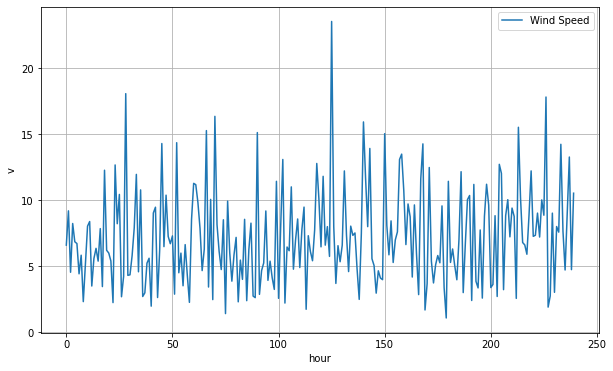

In [137]:
w = Wind.Weibull(c, k)

scenes = []
days = [d for d in range(10)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
v = 0.0
for s in scenes:
    v = w.simulate(s)
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

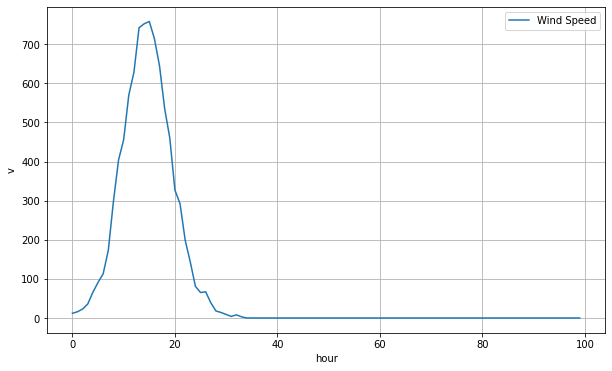

7.545513846354376


In [138]:
w = Wind.CorrelatedWeibull(c, k)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
hg = [0 for i in range(100)]
delta = 0.5

v = 0.0
for s in scenes:
    v = w.simulate(s)
    b = math.floor(v/delta)
    hg[b] = hg[b] + 1
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(hg, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

print(sum(sim)/len(sim))

Temporally-correlated Weibull

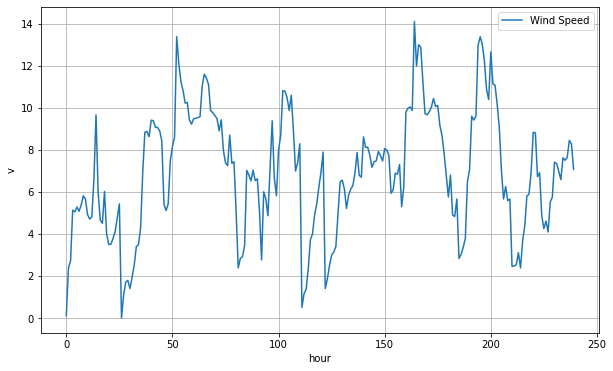

In [132]:
w = Wind.CorrelatedWeibull(c, k)

scenes = []
days = [d for d in range(10)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
v = 0.0
for s in scenes:
    v = w.simulate(s)
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

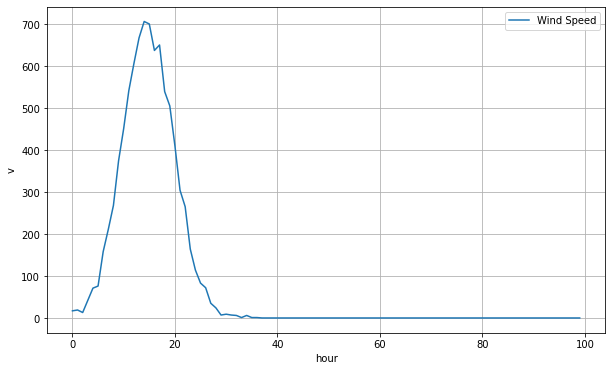

7.658300295554442


In [135]:
w = Wind.CorrelatedWeibull(c, k)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
hg = [0 for i in range(100)]
delta = 0.5

v = 0.0
for s in scenes:
    v = w.simulate(s)
    b = math.floor(v/delta)
    hg[b] = hg[b] + 1
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(hg, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

print(sum(sim)/len(sim))

In [140]:
int(5.99)

5